# Credentials

In [1]:
from googleapiclient.discovery import build

#Credential from  project Baryan Mauricio 

# foi mecessario criar varias chavez de YouTube, pois a quantidade de informação requisitada
#diariamente neste projeto exdia a permitida para um usuario de não pago na  plataforma 
#googlecloud

youTubeApiKey='Coloque aqui sua chave 1'
youtube=build('youtube','v3',developerKey=youTubeApiKey)

#credential from project my first project id Methodological 

youTubeApiKey_um='Coloque aqui sua chave 2'
youtube_um=build('youtube','v3',developerKey=youTubeApiKey_um)


#credential from project my first project 4615

youTubeApiKey_dos='Coloque aqui sua chave 3'
youtube_dos=build('youtube','v3',developerKey=youTubeApiKey_dos)

#credential from my first project

youTubeApiKey_tres='Coloque aqui sua chave 4'
youtube_tres=build('youtube','v3',developerKey=youTubeApiKey_tres)

#credential from my project cinco

youTubeApiKey_quatro='Coloque aqui sua chave 5'
youtube_quatro=build('youtube','v3',developerKey=youTubeApiKey_quatro)







# Montando o Drive

In [2]:
link='/content/drive/MyDrive/MyCopy/You_tube_database/archive/'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Un video

In [ ]:
#Copiado do notebook Queryapi
request = youtube_quatro.videos().list(
          part="id, snippet, contentDetails, player, recordingDetails, statistics, status, topicDetails",
          id='QHa1vbwVaNU'
      )
# fileDetails ,, ,suggestions,
response = request.execute()

In [ ]:
response

{'kind': 'youtube#videoListResponse',
 'etag': 'nuTx0ui_7tQazmrC0Z6yTeWryog',
 'items': [{'kind': 'youtube#video',
   'etag': 'mMsfT5i8FiFKhLDUqW1XAiseGJw',
   'id': 'QHa1vbwVaNU',
   'snippet': {'publishedAt': '2022-09-10T12:00:28Z',
    'channelId': 'UC1yNl2E66ZzKApQdRuTQ4tw',
    'title': 'The Multiverse: Science, Religion, or Pseudoscience?',
    'description': '🌎 Get our exclusive NordVPN deal here ➡️ https://NordVPN.com/sabine It\'s risk-free with Nord\'s 30-day money-back guarantee!\n\nWhy do physicists think that our universe isn\'t the only one? And should you believe them? In this video, I explain what the multiverse is and what the problem is with it. I have talked about this before but in hindsight I think I made it too confusing. This is my new and hopefully improved attempt to summarize the important points.\n\nCorrection: At 5 minutes 20 seconds, the text on screen says "Enternal Inflation" -- that should have been "Eternal Inflation"! Sorry about that!\n\n💌 Sign up for 

In [ ]:
videos='__ur8Ykcivw'
request = youtube.videos().list(
          part="id, snippet, contentDetails, player, recordingDetails, statistics, status, topicDetails",
          id=videos,
          publishedAfter='2022-08-1T18:20:00Z'
      )
# fileDetails ,, ,suggestions,
response = request.execute()
response

SyntaxError: ignored

## Amostrando Videos

In [ ]:
from datetime import datetime

datetime.now()

# current_time = now.strftime("%H:%M:%S")

# print("Current Time =", current_time)

datetime.datetime(2022, 9, 14, 17, 55, 22, 981891)

La hora ajustada  por python es automaticamente la del **Meridiano de Grenwich** en terminos de la hora de São Paulo estariamos hablando de 3 horas más temprano, en otras palabras la hora de Greenwhich le lleva tres horas a São Paulo.

Debido a el poco tiempo que lleva un video para virar tendência en la plataforma estogeremos el horário de publicación de acuerdo con el horario que halla representado la mayor incidencia de publicaciones de vídeos tendência.



**Troca a data**

In [ ]:
# from sre_constants import CATEGORY
Next_page_token= None
i=0
play_list_videos=[]

while i<100:
  request = youtube.search().list(
    part='snippet',
    maxResults=50,# default 5
    regionCode='BR', # Visível desde Brasil
    #relatedToVideoId=videoId,
    publishedAfter='2022-10-05T17:30:00Z', 
    # lembre que a hora aquí colocada esta tres 
    # horas adiantadas com respeito a Brasilia
    pageToken= Next_page_token, 
    type='video',
    #order='rating'
  )
  response=request.execute()
  play_list_videos+=response['items']
  Next_page_token=response.get('nextPageToken')
  i=i+1



In [ ]:
len(play_list_videos)


4864

In [ ]:
play_list_videos[0]['id']['videoId']

'BQl-PHrc-UE'

## Estrutura os novos dados num dataframe 

Pegando os ids

In [ ]:
videos_id=[play_list_videos[i]['id']['videoId'] for i in range(int(len(play_list_videos)))]
len(videos_id)

4958

In [ ]:
iteracoes=len(videos_id)//50
iteracoes

99

Construindo um dataset the views, pegando os videos pasados antes 

In [ ]:
i=0
stats=[]

while i<iteracoes+1:
    request = youtube_dos.videos().list(
              part="statistics",
              #pageToken= Next_page_token, 
              id=videos_id[i*50:(i+1)*50]
          )
    # fileDetails ,, ,suggestions,
    response = request.execute()
    stats+=response['items']
    #Next_page_token=response.get('nextPageToken')
    i=i+1
    

In [ ]:
stats[165]

{'kind': 'youtube#video',
 'etag': 'gFJxAxbAED6a9VxC2OEfr7khomg',
 'id': 'yDkq-L9672A',
 'statistics': {'viewCount': '20855',
  'likeCount': '964',
  'favoriteCount': '0'}}

In [ ]:
len(stats)

4958

In [ ]:
len(videos_id)

4958

O comprimento da lista videos id, pode ser diferente do comprimento da lista stats, assim vamos construir o dataframe da lista stags e depois vamos intersetar com o de vídeos id

Capturando as estadisticas da lista anterior 

In [ ]:
d={'stats':stats}
import pandas as pd

In [ ]:
len(d)

1

In [ ]:

df_stats=pd.DataFrame(d)
df_stats.isna().sum()

stats    0
dtype: int64

In [ ]:
df_stats

,stats
0,"{'kind': 'youtube#video', 'etag': 'Kuphlmy2-Lp..."
1,"{'kind': 'youtube#video', 'etag': 'WyQIzRS-1Rb..."
2,"{'kind': 'youtube#video', 'etag': 'o8m41-55xH8..."
3,"{'kind': 'youtube#video', 'etag': 'KSkA_nWa-Rr..."
4,"{'kind': 'youtube#video', 'etag': 'pGWUUxIv-SF..."
...,...
4953,"{'kind': 'youtube#video', 'etag': 'N_I5zug6SKD..."
4954,"{'kind': 'youtube#video', 'etag': 'xxuj0xoIhLe..."
4955,"{'kind': 'youtube#video', 'etag': 'B-w5r7SHAhS..."
4956,"{'kind': 'youtube#video', 'etag': '678RDO5vKOu..."


In [ ]:
pd_normalize=pd.json_normalize(df_stats['stats'])

In [ ]:
pd_normalize

,kind,etag,id,statistics.viewCount,statistics.likeCount,statistics.favoriteCount,statistics.commentCount
0,youtube#video,Kuphlmy2-LpiQbqasNoXk12rVdQ,jBulntGrnPE,1814472,39294,0,3580
1,youtube#video,WyQIzRS-1Rbv-_I2-y-Ul1_bxwY,c4Dt6F0ykvA,2074130,42979,0,0
2,youtube#video,o8m41-55xH8P3RPDopHQc5Ne8MU,E9jCNiad4kE,1606893,20502,0,0
3,youtube#video,KSkA_nWa-RrDHe-za03m0BzEgkQ,s3mx1GkEUys,537628,9297,0,3671
4,youtube#video,pGWUUxIv-SFw8qpY43orRd9Ij9U,6v2IZnZp6Ak,1468015,10499,0,1817
...,...,...,...,...,...,...,...
4953,youtube#video,N_I5zug6SKD7iOW9NeMXdtFSops,HjPaGr87_Wc,11712,79,0,41
4954,youtube#video,xxuj0xoIhLez8SKlWeimp-RIydE,rroW976Rfgo,19155,616,0,20
4955,youtube#video,B-w5r7SHAhSz0UZZ6-p5f-EqF1Q,CSW5mQ_att4,7223,177,0,227
4956,youtube#video,678RDO5vKOuQVk143PBv5BVbYSI,qxuCW6ixfJw,122041,1842,0,330


In [ ]:
pd_normalize.dtypes

kind                        object
etag                        object
id                          object
statistics.viewCount        object
statistics.likeCount        object
statistics.favoriteCount    object
statistics.commentCount     object
dtype: object

In [ ]:
pd_normalize['statistics.viewCount']=pd.to_numeric(pd_normalize['statistics.viewCount'],errors='coerce',downcast="integer")
pd_normalize['statistics.likeCount']=pd.to_numeric(pd_normalize['statistics.likeCount'],errors='coerce',downcast="integer")
pd_normalize['statistics.commentCount']=pd.to_numeric(pd_normalize['statistics.commentCount'],errors='coerce',downcast="integer")

In [ ]:
pd_normalize

,kind,etag,id,statistics.viewCount,statistics.likeCount,statistics.favoriteCount,statistics.commentCount
0,youtube#video,Kuphlmy2-LpiQbqasNoXk12rVdQ,jBulntGrnPE,1814472,39294.0,0,3580.0
1,youtube#video,WyQIzRS-1Rbv-_I2-y-Ul1_bxwY,c4Dt6F0ykvA,2074130,42979.0,0,0.0
2,youtube#video,o8m41-55xH8P3RPDopHQc5Ne8MU,E9jCNiad4kE,1606893,20502.0,0,0.0
3,youtube#video,KSkA_nWa-RrDHe-za03m0BzEgkQ,s3mx1GkEUys,537628,9297.0,0,3671.0
4,youtube#video,pGWUUxIv-SFw8qpY43orRd9Ij9U,6v2IZnZp6Ak,1468015,10499.0,0,1817.0
...,...,...,...,...,...,...,...
4953,youtube#video,N_I5zug6SKD7iOW9NeMXdtFSops,HjPaGr87_Wc,11712,79.0,0,41.0
4954,youtube#video,xxuj0xoIhLez8SKlWeimp-RIydE,rroW976Rfgo,19155,616.0,0,20.0
4955,youtube#video,B-w5r7SHAhSz0UZZ6-p5f-EqF1Q,CSW5mQ_att4,7223,177.0,0,227.0
4956,youtube#video,678RDO5vKOuQVk143PBv5BVbYSI,qxuCW6ixfJw,122041,1842.0,0,330.0


In [ ]:
pd_normalize=pd_normalize[['id','statistics.viewCount','statistics.likeCount','statistics.commentCount']]

In [ ]:
pd_normalize.rename(columns ={'statistics.viewCount':'Vistas','statistics.likeCount':'likes','statistics.commentCount':'Comentarios'}, inplace=True)
pd_normalize

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,id,Vistas,likes,Comentarios
0,jBulntGrnPE,1814472,39294.0,3580.0
1,c4Dt6F0ykvA,2074130,42979.0,0.0
2,E9jCNiad4kE,1606893,20502.0,0.0
3,s3mx1GkEUys,537628,9297.0,3671.0
4,6v2IZnZp6Ak,1468015,10499.0,1817.0
...,...,...,...,...
4953,HjPaGr87_Wc,11712,79.0,41.0
4954,rroW976Rfgo,19155,616.0,20.0
4955,CSW5mQ_att4,7223,177.0,227.0
4956,qxuCW6ixfJw,122041,1842.0,330.0


In [ ]:
pd_stats=pd_normalize.copy()

Façamos este processo de extração todo de uma vez só para a listas

In [ ]:
d={'items':play_list_videos}
df=pd.DataFrame(d)
pd_normalize=pd.json_normalize(df['items'])
pd_normalize=pd_normalize[['id.videoId','snippet.channelId','snippet.publishedAt','snippet.title']]
pd_normalize.rename(columns={'id.videoId':'id','snippet.channelId':'C_id','snippet.publishedAt':'Data','snippet.title':'Título'},inplace=True)


In [ ]:
pd_normalize.head(2)

,id,C_id,Data,Título
0,jBulntGrnPE,UCQzdMyuz0Lf4zo4uGcEujFw,2022-09-19T02:00:12Z,Season 1 Episode 6 Preview | House of the Drag...
1,c4Dt6F0ykvA,UCDVYQ4Zhbm3S2dlz7P1GBDg,2022-09-18T20:37:55Z,Miami Dolphins vs. Baltimore Ravens | 2022 Wee...


In [ ]:
a=list(pd_stats['id'])


In [ ]:
Cid=[list(pd_normalize.loc[pd_normalize['id']==a[i]]['C_id'])[0] for i in range(len(a))]

In [ ]:
Data=[list(pd_normalize.loc[pd_normalize['id']==a[i]]['Data'])[0] for i in range(len(a))]


In [ ]:
Titulo=[list(pd_normalize.loc[pd_normalize['id']==a[i]]['Título'])[0] for i in range(len(a))]

In [ ]:
len(pd_stats)

4958

In [ ]:
pd_stats['C_id']=Cid

In [ ]:
pd_stats['Data']=Data

In [ ]:
pd_stats['Titulo']=Titulo

In [ ]:
pd_stats.head(2)

,id,Vistas,likes,Comentarios,C_id,Data,Titulo
0,jBulntGrnPE,1814472,39294.0,3580.0,UCQzdMyuz0Lf4zo4uGcEujFw,2022-09-19T02:00:12Z,Season 1 Episode 6 Preview | House of the Drag...
1,c4Dt6F0ykvA,2074130,42979.0,0.0,UCDVYQ4Zhbm3S2dlz7P1GBDg,2022-09-18T20:37:55Z,Miami Dolphins vs. Baltimore Ravens | 2022 Wee...


Trazendo os canais

In [ ]:
type(pd_stats['C_id'].unique())

numpy.ndarray

In [ ]:
channels_id=list(pd_stats['C_id'])
channels_id[0]

'UCQzdMyuz0Lf4zo4uGcEujFw'

In [ ]:
len(channels_id)

4958

In [ ]:
channels=[]
for i in channels_id:
  request = youtube_um.channels().list(
            part="snippet,contentDetails,statistics",
            id=i
        )
  response = request.execute()
  channels+=response['items']

In [ ]:
d={'canal':channels}
df=pd.DataFrame(d)
pd_normalize=pd.json_normalize(df['canal'])
pd_normalize=pd_normalize[['id','snippet.publishedAt','snippet.title','snippet.country','statistics.viewCount','statistics.subscriberCount','statistics.videoCount']]
pd_normalize.rename(columns={'id':'C_id','snippet.publishedAt':'Data','snippet.title':'C_Titulo','snippet.country':'Pais','statistics.viewCount':'Vistas','statistics.subscriberCount':'Subscriptores','statistics.videoCount':'No Videos'},inplace=True)
pd_normalize

,C_id,Data,C_Titulo,Pais,Vistas,Subscriptores,No Videos
0,UCQzdMyuz0Lf4zo4uGcEujFw,2007-09-29T02:50:52Z,GameofThrones,NaN,1242804282,4680000,891
1,UCDVYQ4Zhbm3S2dlz7P1GBDg,2014-12-14T02:07:35Z,NFL,NaN,7095782393,9760000,26065
2,UCDVYQ4Zhbm3S2dlz7P1GBDg,2014-12-14T02:07:35Z,NFL,NaN,7095782393,9760000,26065
3,UCaXkIU1QidjPwiAYu6GcHjg,2011-12-01T19:16:09Z,MSNBC,NaN,8682222509,5220000,58189
4,UCTrQ7HXWRRxr7OsOtodr2_w,2006-07-05T23:18:56Z,Channel 4 News,GB,1158211532,2260000,13383
...,...,...,...,...,...,...,...
4953,UCj-RTZE-V3Q6jleatRR9k2A,2012-08-24T22:35:33Z,O POVO Online,BR,134983775,455000,9942
4954,UC11JFCoslUUMTuAsUPH8RdQ,2015-11-04T16:46:54Z,Humor Multishow,BR,3067890839,7560000,5104
4955,UCaXkIU1QidjPwiAYu6GcHjg,2011-12-01T19:16:09Z,MSNBC,NaN,8682222509,5220000,58189
4956,UCIu9zJq00ev2xj37kvyHtZQ,2015-02-03T19:23:32Z,Beyaz Futbol,TR,305873491,504000,4063


In [ ]:
pd_normalize['Vistas']=pd.to_numeric(pd_normalize['Vistas'],errors='coerce',downcast="integer")
pd_normalize['Subscriptores']=pd.to_numeric(pd_normalize['Subscriptores'],errors='coerce',downcast="integer")
pd_normalize['No Videos']=pd.to_numeric(pd_normalize['No Videos'],errors='coerce',downcast="integer")

In [ ]:
pd_normalize.dtypes

C_id             object
Data             object
C_Titulo         object
Pais             object
Vistas            int64
Subscriptores     int32
No Videos         int32
dtype: object

In [ ]:
pd_normalize.head(1)

,C_id,Data,C_Titulo,Pais,Vistas,Subscriptores,No Videos
0,UCQzdMyuz0Lf4zo4uGcEujFw,2007-09-29T02:50:52Z,GameofThrones,NaN,1242804282,4680000,891


In [ ]:
pd_stats[['C_Data','C_Titulo','Pais','C_Vistas','Subscriptores','No Videos']]=pd_normalize[['Data','C_Titulo','Pais','Vistas','Subscriptores','No Videos']]

In [ ]:
pd_stats

,id,Vistas,likes,Comentarios,C_id,Data,Titulo,C_Data,C_Titulo,Pais,C_Vistas,Subscriptores,No Videos
0,jBulntGrnPE,1814472,39294.0,3580.0,UCQzdMyuz0Lf4zo4uGcEujFw,2022-09-19T02:00:12Z,Season 1 Episode 6 Preview | House of the Drag...,2007-09-29T02:50:52Z,GameofThrones,NaN,1242804282,4680000,891
1,c4Dt6F0ykvA,2074130,42979.0,0.0,UCDVYQ4Zhbm3S2dlz7P1GBDg,2022-09-18T20:37:55Z,Miami Dolphins vs. Baltimore Ravens | 2022 Wee...,2014-12-14T02:07:35Z,NFL,NaN,7095782393,9760000,26065
2,E9jCNiad4kE,1606893,20502.0,0.0,UCDVYQ4Zhbm3S2dlz7P1GBDg,2022-09-18T20:27:23Z,Tampa Bay Buccaneers vs. New Orleans Saints | ...,2014-12-14T02:07:35Z,NFL,NaN,7095782393,9760000,26065
3,s3mx1GkEUys,537628,9297.0,3671.0,UCaXkIU1QidjPwiAYu6GcHjg,2022-09-19T02:00:22Z,Trump’s Indictment Is ‘Unavoidable’ In Mar-a-L...,2011-12-01T19:16:09Z,MSNBC,NaN,8682222509,5220000,58189
4,6v2IZnZp6Ak,1468015,10499.0,1817.0,UCTrQ7HXWRRxr7OsOtodr2_w,2022-09-18T17:56:16Z,Queen Elizabeth II: Final preparations made fo...,2006-07-05T23:18:56Z,Channel 4 News,GB,1158211532,2260000,13383
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4953,HjPaGr87_Wc,11712,79.0,41.0,UCj-RTZE-V3Q6jleatRR9k2A,2022-09-18T18:26:24Z,Homem morre após levar chifrada durante tourad...,2012-08-24T22:35:33Z,O POVO Online,BR,134983775,455000,9942
4954,rroW976Rfgo,19155,616.0,20.0,UC11JFCoslUUMTuAsUPH8RdQ,2022-09-18T21:00:30Z,"Luísa Sonza e PA, Carlinhos Maia bloqueado: as...",2015-11-04T16:46:54Z,Humor Multishow,BR,3067890839,7560000,5104
4955,CSW5mQ_att4,7223,177.0,227.0,UCaXkIU1QidjPwiAYu6GcHjg,2022-09-18T18:30:10Z,"&#39;Decent, Honorable And All About Service&#...",2011-12-01T19:16:09Z,MSNBC,NaN,8682222509,5220000,58189
4956,qxuCW6ixfJw,122041,1842.0,330.0,UCIu9zJq00ev2xj37kvyHtZQ,2022-09-18T22:36:57Z,Beyaz Futbol 18 Eylül 2022 2.Kısım ( Fenerbahç...,2015-02-03T19:23:32Z,Beyaz Futbol,TR,305873491,504000,4063


In [ ]:
# pd_stats['Pais'].value_counts()
pd_stats.isna().sum()

id                 0
Vistas             0
likes            106
Comentarios      153
C_id               0
Data               0
Titulo             0
C_Data             0
C_Titulo           0
Pais             749
C_Vistas           0
Subscriptores      0
No Videos          0
dtype: int64

## Adiciona os novos videos aos  já amostrados em dias anteriores

O data frame criado na etapa anterior chama-se 
pd_stats

In [ ]:
link='/content/drive/MyDrive/MyCopy/You_tube_database/archive/'

In [ ]:
pd_stats.shape

(4958, 13)

Carregamos os vídeos de dias anteriores

In [ ]:
amostras_anterior=pd.read_csv(link+'amostra_de_videos.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
amostras_anterior.shape

(143180, 15)

In [ ]:
pd_stats.shape

(4958, 13)

Agregando os novos dados **pd_stats** aos velhos dados **amostras_anterior**, 

In [ ]:
novas_amostras = amostras_anterior.append(pd_stats, ignore_index=True)
novas_amostras=novas_amostras.drop(columns='Unnamed: 0')

In [ ]:
novas_amostras.shape

(148138, 14)

Verifiquemos que a adição se realizou apropiadamente.

A ultima instancia dos dados coletados em dias anteriores é:

In [ ]:
amostras_anterior.tail(1)

,Unnamed: 0,id,Vistas,likes,Comentarios,C_id,Data,Título,C_Data,C_Titulo,Pais,C_Vistas,Subscriptores,No Videos,Titulo
133279,133279,GcxBDSj4eGo,89125.0,5186.0,64.0,UCuUUWPHIioyfmctnDpwsFzw,2022-09-15T00:21:24Z,NaN,2021-02-26T15:05:09.860468Z,POD DELAS,BR,132642806,1920000.0,205,VANESSA LOPES - PODDELAS #203


Por outro lado a primeira estancia dos dados novos é


In [ ]:
pd_stats.head(1)

,id,Vistas,likes,Comentarios,C_id,Data,Titulo,C_Data,C_Titulo,Pais,C_Vistas,Subscriptores,No Videos
0,jBulntGrnPE,1814472,39294.0,3580.0,UCQzdMyuz0Lf4zo4uGcEujFw,2022-09-19T02:00:12Z,Season 1 Episode 6 Preview | House of the Drag...,2007-09-29T02:50:52Z,GameofThrones,NaN,1242804282,4680000,891


Logo o ponto de união acontece em:


In [ ]:
novas_amostras.iloc[[amostras_anterior.shape[0]-1,amostras_anterior.shape[0]]]

,id,Vistas,likes,Comentarios,C_id,Data,Título,C_Data,C_Titulo,Pais,C_Vistas,Subscriptores,No Videos,Titulo
93650,X9o5BrTGBNM,745353.0,48860.0,1743.0,UCLtCejNl8eAg4PO_9lf2TIg,2022-09-05T04:35:00Z,NaN,2011-08-10T09:40:41Z,Anand Audio,IN,6630823566,9900000.0,4552,Guru Shishyaru | Trailer | Sharaan|Nishvika|Th...
93651,TV2UOZX-S20,808690.0,15244.0,1400.0,UC1NF71EwP41VdjAU1iXdLkw,2022-09-06T03:49:16Z,NaN,2007-10-26T18:09:55Z,Narendra Modi,IN,2402510854,12500000.0,17291,PM Modi attends ceremonial welcome of Banglade...


Verificando o estado do Dataframe, na requisição para o país


In [ ]:
novas_amostras['Pais'].value_counts()

BR    70019
US     9785
KR     8929
TH     8334
IN     7605
      ...  
VE        1
MZ        1
UZ        1
AM        1
MK        1
Name: Pais, Length: 109, dtype: int64


## Exportando hacia google drive 

La union de los nuevos datos con los antiguos está guardada en el DataFrame **novas_amostras**

In [ ]:

novas_amostras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128311 entries, 0 to 128310
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             128311 non-null  object 
 1   Vistas         128302 non-null  float64
 2   likes          126426 non-null  float64
 3   Comentarios    123118 non-null  float64
 4   C_id           128311 non-null  object 
 5   Data           128311 non-null  object 
 6   Título         63989 non-null   object 
 7   C_Data         128311 non-null  object 
 8   C_Titulo       128311 non-null  object 
 9   Pais           114603 non-null  object 
 10  C_Vistas       128311 non-null  int64  
 11  Subscriptores  128297 non-null  float64
 12  No Videos      128311 non-null  int64  
 13  Titulo         64322 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 13.7+ MB


In [ ]:
link

'/content/drive/MyDrive/MyCopy/You_tube_database/archive/'

In [ ]:
with open(link+'amostra_de_videos.csv', 'w') as f:
  novas_amostras.to_csv(f)

## Construindo interativamente o data frame


Definiremos uma função que pega uma lista de videos que tem uma quantidade de vídeos mltipla de 50, e depois para esses vídeos 



In [ ]:
def captura_de_views(videos_id):
  i=0
  stats=[]
  quantidade_views=[]

  while i<2:
      request = youtube.videos().list(
                part="statistics",
                #pageToken= Next_page_token, 
                id=videos_id[i*50:(i+1)*50]
            )
      # fileDetails ,, ,suggestions,
      response = request.execute()
      stats+=response['items']
      #Next_page_token=response.get('nextPageToken')
      i=i+1
  quantidade_views = [stats[i]['statistics']['viewCount'] for i in range(len(stats))] 
  return(quantidade_views)


In [ ]:
from datetime import datetime



In [ ]:
import time
  
i=0  
while(i<3):
    df[datetime.now().strftime("%d-%m at %H:%M")]=captura_de_views(videos_id)
    i=i+1
    time.sleep(60)


In [ ]:
df

,Views,26-07 at 22:38,26-07 at 22:39,26-07 at 22:40
Video,,,,
tzl8Y0yTon4,79752,79752,79840,79840
1dOlGVnzMZc,468957,469748,469752,469752
H8-gUuyJm8k,530397,530397,530397,530397
clf7stNtaOI,1937676,1937676,1937676,1937792
DZQxQNC5xYw,89004,89004,89004,89004
...,...,...,...,...
3PTw9dvjbIc,32072,32240,32245,32245
BF5IszgvZP8,603657,603657,603657,606024
oJ5RQlLupIw,638872,640203,640203,640203


In [ ]:
#indices=range(6)
df.iloc[:, 0]=pd.to_numeric(df.iloc[:, 0])
df.iloc[:, 1]=pd.to_numeric(df.iloc[:, 1])
df.iloc[:, 2]=pd.to_numeric(df.iloc[:, 2])
df.iloc[:, 3]=pd.to_numeric(df.iloc[:, 3])



In [ ]:
df.dtypes

Views             int64
26-07 at 22:38    int64
26-07 at 22:39    int64
26-07 at 22:40    int64
dtype: object

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f4489b14c50> has a label of '__ur8Ykcivw' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f448825d750> has a label of '_3Ooq3vXe98' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:633: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f4488081e50> has a label of '_1IgBhngQto' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


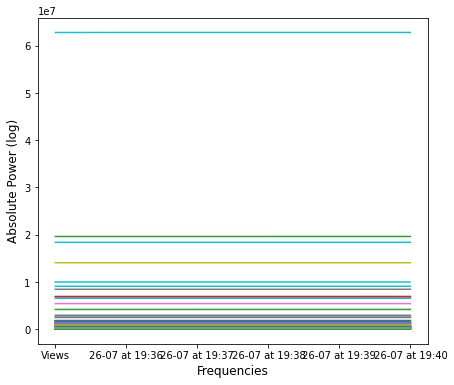

In [ ]:
import matplotlib.pyplot as plt



# transpose and plot
ax = df.T.plot(figsize=(7, 6))
ax.set_ylabel('Views', fontsize=12)
ax.set_xlabel('Dates', fontsize=12)
ax.get_legend().remove()
plt.show()

In [ ]:
dft=df.T
dft


Video,gej0Wj5Mr0A,bMFGP35xnD4,dBaVDq_qP2Y,BV8mdtNnrwk,p0MKOEmF9cA,oHDi01Yn4tY,Tr7mwAGTdK4,eFx3DB6dcUw,__ur8Ykcivw,MrktLFjzYWQ,...,wSWe10Vqn-Q,hOGuaMazCz8,p0MKOEmF9cA,8oCQbXvBF-k,73vl1-ljARc,s8Ak8G3B0ak,zCIcLE1GWUo,H6trv40u1mw,UH-TqH_SSIk,idynFPj5-UU
Views,301176,767509,557827,218072,350648,1320498,8464857,189117,9193391,809987,...,648538,21167862,350648,184502,287957,267230,6844571,77501,119386,332274
26-07 at 21:35,301176,767780,557827,218072,350710,1320498,8464857,189117,9193391,809987,...,648538,21167862,350710,184502,287957,267230,6844571,77501,119386,332274
26-07 at 21:36,301176,767780,557866,218073,350710,1320872,8464857,189140,9193391,809987,...,648538,21167862,350710,184502,287957,267230,6844571,77501,119386,332327
26-07 at 21:37,301176,767780,557866,218073,350710,1320872,8464857,189140,9196770,810307,...,648538,21167862,350710,184502,287957,267230,6844571,77501,119386,332327
26-07 at 21:38,301176,767780,557866,218073,350710,1320872,8464857,189140,9196770,810307,...,648538,21169912,350710,184502,287976,267234,6845049,77501,119386,332327
26-07 at 21:39,301176,767780,557866,218073,350710,1320872,8464857,189140,9196770,810307,...,648538,21169912,350710,184502,287976,267234,6845049,77514,119396,332327
26-07 at 21:40,301221,768099,557866,218073,350781,1321765,8465160,189191,9196770,810307,...,648538,21169912,350781,184502,287976,267234,6845049,77514,119396,332327


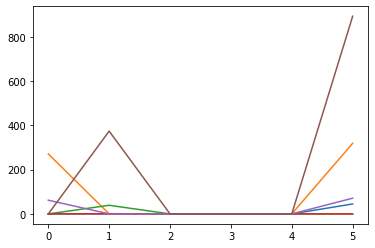

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#y = np.diff(dft['gej0Wj5Mr0A'])
#y = np.diff(dft.iloc[:, 0])

i=0

plt.plot(np.diff(dft.iloc[:, 0]))
plt.plot(np.diff(dft.iloc[:, 1]))
plt.plot(np.diff(dft.iloc[:, 2]))
plt.plot(np.diff(dft.iloc[:, 3]))
plt.plot(np.diff(dft.iloc[:, 4]))
plt.plot(np.diff(dft.iloc[:, 5]))



## Complementado a base de dados tendencias com as durações 



In [ ]:
import pandas as pd
import numpy as np
link


'/content/drive/MyDrive/MyCopy/You_tube_database/archive/'

In [ ]:
tendencias=pd.read_csv(link+'tendencias_tratadas.csv',lineterminator='\n')

In [ ]:
print(tendencias.shape)
print(len(tendencias['Id'].unique()))

(150061, 17)
23366


In [ ]:
tendencias.sample(2)

,Unnamed: 0,Id,Titulo,Data,C_id,C_titulo,Categoria,Data_tendencia,Etiqueta,Vistas,likes,dislikes,Q_comentarios,Descricao,Duracao,C_Data,Subscriptores
17111,18004,rS2UJpD3tQQ,PREPAREI UMA SURPRESA PRA ELA! ‹ JonVlogs ›,2020-11-10 22:00:12+00:00,UCbIV7t22dH_d75fv1GP56zA,Jon Vlogs,Entertainment,2020-11-11 00:00:00+00:00,JonVlogs|intercambio|dia|nos|eua|jon|jhon|john...,145368,35283,261,509,"Fala ae galera, blz? Como falei pra vocês no ú...",484.0,2015-09-13 05:19:14+00:00,6760000.0
37847,39606,-X-mA9N-_Hc,TROLEI MINHA AMIGA NO ANIVERSÁRIO DELA,2021-03-01 14:15:01+00:00,UC8gWf3nGUdGhp_fNUBOrCtA,Dani Nobrega,People & Blogs,2021-03-02 00:00:00+00:00,[None],157725,30413,205,1455,"Genteeee, o que vocês acharam desse presente? ...",1011.0,2021-02-18 04:13:44.693282+00:00,1380000.0


In [ ]:
tendencias=tendencias.drop(columns='Unnamed: 0')
tendencias.sample(1)

,Id,Titulo,Data,C_id,C_titulo,Categoria,Data_tendencia,Etiqueta,Vistas,likes,dislikes,Q_comentarios,Descricao,Duracao,C_Data,Subscriptores
101784,Ladql7BS0Jw,ESTOU NAMORANDO!! *nos conhecendo melhor*,2022-01-12 15:22:48+00:00,UCxYqdYKUNyuKt2pJMIt4P7g,Thaís Chagas,People & Blogs,2022-01-18 00:00:00+00:00,[None],204018,23764,0,658,NaN,702.0,2015-12-06 16:33:39+00:00,678000.0


In [ ]:
ids=list(tendencias['Id'].unique())


In [ ]:
len(ids)

23366

In [ ]:
request = youtube_tres.videos().list(
          part="id, snippet, contentDetails, player, recordingDetails, statistics, status, topicDetails",
          id='wxvduBB8jPo'
      )
# fileDetails ,, ,suggestions,
response = request.execute()
# response

A part snippet contem a categoria, e  content details contem a duração dos vídeos .

In [ ]:
i=0
durations=[]

for i in range(100):
  request = youtube_tres.videos().list(
            part="contentDetails",
            id=ids[50*i:(i+1)*50]
        )
  # fileDetails ,, ,suggestions,
  response = request.execute()
  durations+=response['items']


In [ ]:
i=0
for i in range(100,200):
  request = youtube_tres.videos().list(
            part="contentDetails",
            id=ids[50*i:(i+1)*50]
        )
  # fileDetails ,, ,suggestions,
  response = request.execute()
  durations+=response['items']

In [ ]:
durations_save=durations.copy()

In [ ]:
i=0
for i in range(200,300):
  request = youtube_tres.videos().list(
            part="contentDetails",
            id=ids[50*i:(i+1)*50]
        )
  # fileDetails ,, ,suggestions,
  response = request.execute()
  durations+=response['items']

In [ ]:
i=0
for i in range(300,400):
  request = youtube_tres.videos().list(
            part="contentDetails",
            id=ids[50*i:(i+1)*50]
        )
  # fileDetails ,, ,suggestions,
  response = request.execute()
  durations+=response['items']

In [ ]:
i=0
for i in range(400*50,len(ids)):
  request = youtube_tres.videos().list(
            part="contentDetails",
            id=ids[i]
        )
  # fileDetails ,, ,suggestions,
  response = request.execute()
  durations+=response['items']

In [ ]:
len(durations)

23366

In [ ]:
len(durations_save)

9528

In [ ]:
df=pd.DataFrame(durations)
df

,kind,etag,id,contentDetails
0,youtube#video,eLwWwogrdm-A6VKRUL6sGg4Frlw,s9FH4rDMvds,"{'duration': 'PT10M4S', 'dimension': '2d', 'de..."
1,youtube#video,brRSc5SLleyLwZDY6B-6Kf9X1Y0,jbGRowa5tIk,"{'duration': 'PT21S', 'dimension': '2d', 'defi..."
2,youtube#video,2ztZj4u22qA66F-Q99Ww7992IqQ,3EfkCrXKZNs,"{'duration': 'PT3M5S', 'dimension': '2d', 'def..."
3,youtube#video,YnYxm_OZi4zC6_5n8sKPvJ_Y-cY,gBjox7vn3-g,"{'duration': 'PT3M39S', 'dimension': '2d', 'de..."
4,youtube#video,ToN5lx5uIJeb0AfAmnI2iVy2Lx8,npoUGx7UW7o,"{'duration': 'PT31M18S', 'dimension': '2d', 'd..."
...,...,...,...,...
23361,youtube#video,yHgTxV_l40L_RQSpaC8qDt5LSVk,gM7gQkQrWco,"{'duration': 'PT3M13S', 'dimension': '2d', 'de..."
23362,youtube#video,HDiHpE2iZxNLDda8BPNa7WGNtpI,uWrpRzCPrnc,"{'duration': 'PT8M14S', 'dimension': '2d', 'de..."
23363,youtube#video,oxMG6qxgAgr5YvCmAQ5WGAZtHas,l4zalgSV9ec,"{'duration': 'PT3M6S', 'dimension': '2d', 'def..."
23364,youtube#video,3f9k4uDS2D241nmCar0hFIJn-58,WUUvw3fSYdk,"{'duration': 'PT18M11S', 'dimension': '2d', 'd..."


In [ ]:
# with open(link+'durations.csv', 'w') as f:
#   df.to_csv(f)

In [ ]:
d={'items':durations}
df=pd.DataFrame(d)
pd_normalize=pd.json_normalize(df['items'])
pd_normalize=pd_normalize[['id','contentDetails.duration']]
pd_normalize.rename(columns={'contentDetails.duration':'Duracao'},inplace=True)
pd_normalize.head(1)


,id,Duracao
0,s9FH4rDMvds,PT10M4S


Guardamos uma copia por segurança

In [ ]:
df_copy=pd_normalize.copy()

In [ ]:
df_copy.shape

(23366, 2)

E vamos guardar eles num documento csv, caso sejam detetadas falhas no tratamento de dados

In [ ]:
link='/content/drive/MyDrive/MyCopy/You_tube_database/archive/'

# fluff, id = link.split('d/')

In [ ]:
# with open(link+'durations_non_format.csv', 'w') as f:
#   pd_normalize.to_csv(f)

**C<omeçando desde aqui**

In [ ]:
pd_normalize=pd.read_csv(link+'durations_non_format.csv')
pd_normalize=pd_normalize.drop(columns='Unnamed: 0')
pd_normalize.head(6)

,id,Duracao
0,s9FH4rDMvds,PT10M4S
1,jbGRowa5tIk,PT21S
2,3EfkCrXKZNs,PT3M5S
3,gBjox7vn3-g,PT3M39S
4,npoUGx7UW7o,PT31M18S
5,Vu6PNpYKu2U,PT18M15S


In [ ]:
df_copy=pd_normalize.copy()

In [ ]:
pd_normalize.dtypes

id         object
Duracao    object
dtype: object

O objetivo é ter  uma varivel duração como uma variável numérica, no formato de estring no qual esta atualmente, não encontrei uma forma direta de converter em número, note que a mínima unidade são os segundos, farei uma função para transformar estes strings na quantidade de segundos, usarei a estruturs regular PT##H##M##S para converter os strings

In [ ]:
import re

Usando a função re.split posso indicar quais caracteres pode eliminar

In [ ]:
a=re.split('[h-t]+','PT1H10M4S', flags=re.IGNORECASE)
a

['', '1', '10', '4', '']

Do jeido quee estamos dividindo sempre, vai ter as virgolas, isto poderia ser simplesmente acrescentado, uma condição ao regex, mas preferimos eliminarlo da lista, já que as posições das virgolas nesta lista sempre serão na primeira e última posição.


Fazemos isto e convertimos para inteiros os números restante

In [ ]:
a=a[1:-1]
a=[int(i) for i in a]
a

[1, 10, 4]

In [ ]:
a[0]*60+a[1]

70

In [ ]:
time='3H'
a=re.split('S',time, flags=re.IGNORECASE)
print('string a',a)
b=re.split('M',str(a[0]))
print('string b',b,len(b))
c=re.split('H',str(b[0]))
print('string c',c,len(c))

string a ['3H']
string b ['3H'] 1
string c ['3', ''] 2


In [ ]:
def sugundos(palavra):
    segundos=0
    a=re.split('S',time, flags=re.IGNORECASE)
    

In [ ]:
def to_segundos(time):   
    # re.split('[f-u]+',time, flags=re.IGNORECASE)
    minutos=0
    segundos=0
    horas=0
    a=re.split('PT',time, flags=re.IGNORECASE)
    b=re.split('S',str(a[-1]))
    if len(b)==2:
        # print('HÁ SEGUNDOS')
        c=re.split('M',str(b[0]))

        if len(c)==2:
            segundos=int(c[-1])  
            # print('HÁ MINUTOS')

            d=re.split('H',str(c[0]))

            if len(d)==2:
                # print('HÁ HORAS')
                minutos=int(d[-1])*60      
                horas=int(d[-2])*3600
            else:
                # print('NÃO HORAS')
                minutos=int(d[0])*60         
                horas=0
        else:
            # print('NÃO HÁ MINUTOS')

            minutos=0
            d=re.split('H',str(c[0]))
            if len(d)==2:
                # print('HÁ HORAS')
                segundos=int(d[-1])  

                horas=int(d[-2])*3600
            else:
                # print('NÃO HÁ HORAS')
                segundos=int(b[0])  
                horas=0
    else:

        # print(' NÃO HA SEGUNDOS')

        seguindos=0
        c=re.split('M',str(b[0]))
        if len(c)==2:

            # print(' HÁ MINUTOS  ')

            d=re.split('H',str(c[0]))

            if len(d)==2:
                # print('HÁ HORAS')
                minutos=int(d[-1])*60
                horas=int(d[-2])*3600
            else:
                # print('NÃO HÁ HORAS')
                minutos=int(d[0])*60       
                horas=0
        else:
            # print('NÃO HÁ MINUTOS ')              

            minutos=0
            d=re.split('H',str(c[0]))

            if len(d)==2:
                # print('HÁ HORAS')    

                horas=int(d[-2])*3600
            else:
                # prin('NÃO HÁ HORAS')

                horas=0
    total=horas+minutos+segundos

    return total
          
                                   
                   
        
                   
                   


In [ ]:
to_segundos('PT1H5S')

3605

Colocando agora isto numa função, que simuaneamente converta o strint para lista, e a lusta para segundos

In [ ]:
def dura_to_segun(time):
  segundos=0
  import re 
  a=re.split('[f-u]+',time, flags=re.IGNORECASE)
  a=a[1:-1]
  a=[int(i) for i in a]
  if len(a)==2:
    segundos=a[0]*60+a[1]
  elif len(a)==3:
    segundos=a[2]+60*(a[1]+a[0]*60)
  else:
    segundos=a[0]
  
  return segundos

 



In [ ]:
dura_to_segun('PT10H4S')

604

In [ ]:
print(dura_to_segun('PT4H30S'),to_segundos('PT4H30S'))

270 14430


Agora aplicaremos esta função á coluna durations

In [ ]:
# Duracoes=[df_copy['Duracao'][i] for i in range(len(df_copy))]
# Duracoes

In [ ]:
df_copy['Duracao']=df_copy['Duracao'].apply(to_segundos)


In [ ]:
df_copy.dtypes

id         object
Duracao     int64
dtype: object

In [ ]:
df_copy.sample(5)

,id,Duracao
17392,X5PpsTPNEfk,10
17355,FAIsxLtUtvQ,425
14680,x_4Rit4cfEI,229
434,sCTnDfnQpnI,171
9254,f-ijzlXtmYE,748


In [ ]:
len(df_copy[df_copy['Duracao']<=30])

1091

In [ ]:
df_copy.isna().sum()

id         0
Duracao    0
dtype: int64

In [ ]:
df_copy.head(2)

,id,Duracao
0,s9FH4rDMvds,604
1,jbGRowa5tIk,21


In [ ]:
link

'/content/drive/MyDrive/MyCopy/You_tube_database/archive/'

In [ ]:
# with open(link+'durations.csv', 'w') as f:
#   df_copy.to_csv(f)

In [ ]:
link='/content/drive/MyDrive/python/You_tube_database/archive/'

In [ ]:
import pandas as pd
duration=pd.read_csv(link+'durations.csv')
duration=duration.drop(columns='Unnamed: 0')
duration

,id,Duracao
0,s9FH4rDMvds,604
1,jbGRowa5tIk,21
2,3EfkCrXKZNs,185
3,npoUGx7UW7o,1878
4,Vu6PNpYKu2U,1095
...,...,...
22860,AfCZTJS65k4,1239
22861,vExtiIWz52o,49
22862,UYlAeI87Dsg,815
22863,8MBQDiaBsR8,1041


## Segunda parte de anexar as durações dos videso amostra

In [9]:
import pandas as pd
import numpy as np
import re



link ='/content/drive/MyDrive/MyCopy/You_tube_database/archive/'

dados_original=pd.read_csv(link+'amostra_de_videos.csv')

dados=dados_original.copy()
dados=dados.drop(columns='Unnamed: 0')
print(dados.shape)


(148138, 14)


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [10]:
dados=dados.rename(columns={'id':'Id'})
# dados.columns
amostras=dados.copy()
print(len(amostras['Id'].unique()))

ids=list(amostras['Id'].unique())

i=0
durations=[]

for i in np.arange(603):
  request = youtube_quatro.videos().list(
            part="snippet,contentDetails",
            id=ids[50*i:(i+1)*50]
        )
  # fileDetails ,, ,suggestions,
  response = request.execute()
  durations+=response['items']


df=pd.DataFrame(durations)



31164


In [11]:
# ids
durations_1=[]
request = youtube_dos.videos().list(
            part="snippet,contentDetails",
            id=ids[31150:len(ids)]
        )
  # fileDetails ,, ,suggestions,
response = request.execute()
durations_1+=response['items']

In [12]:
c=durations+durations_1
print(len(durations),'+',len(durations_1),'=',len(c))
durations=c
len(durations)

28934 + 13 = 28947


28947

In [13]:
durations=durations[:28929]+durations[28931:]
len(durations)

28945

In [14]:
d={'items':durations}
df=pd.DataFrame(d)


d={'items':durations}
df=pd.DataFrame(d)
pd_normalize=pd.json_normalize(df['items'])
pd_normalize=pd_normalize[['id','snippet.categoryId','contentDetails.duration']]
pd_normalize.rename(columns={'snippet.categoryId':'Categoria','contentDetails.duration':'Duracao'},inplace=True)
pd_normalize.head(1)

df_copy=pd_normalize.copy()
#tem um video indiano que demora um dia eliminamos ele por irrelevante
# veja ele https://www.youtube.com/watch?v=jptDV-uPoLw
df_copy=df_copy[~(df_copy['Duracao']=='P1DT1S')]

In [15]:

def to_segundos(time):   
    # re.split('[f-u]+',time, flags=re.IGNORECASE)
    minutos=0
    segundos=0
    horas=0
    a=re.split('PT',time, flags=re.IGNORECASE)
    b=re.split('S',str(a[-1]))
    if len(b)==2:
        # print('HÁ SEGUNDOS')
        c=re.split('M',str(b[0]))

        if len(c)==2:
            segundos=int(c[-1])  
            # print('HÁ MINUTOS')

            d=re.split('H',str(c[0]))

            if len(d)==2:
                # print('HÁ HORAS')
                minutos=int(d[-1])*60      
                horas=int(d[-2])*3600
            else:
                # print('NÃO HORAS')
                minutos=int(d[0])*60         
                horas=0
        else:
            # print('NÃO HÁ MINUTOS')

            minutos=0
            d=re.split('H',str(c[0]))
            if len(d)==2:
                # print('HÁ HORAS')
                segundos=int(d[-1])  

                horas=int(d[-2])*3600
            else:
                # print('NÃO HÁ HORAS')
                segundos=int(b[0])  
                horas=0
    else:

        # print(' NÃO HA SEGUNDOS')

        seguindos=0
        c=re.split('M',str(b[0]))
        if len(c)==2:

            # print(' HÁ MINUTOS  ')

            d=re.split('H',str(c[0]))

            if len(d)==2:
                # print('HÁ HORAS')
                minutos=int(d[-1])*60
                horas=int(d[-2])*3600
            else:
                # print('NÃO HÁ HORAS')
                minutos=int(d[0])*60       
                horas=0
        else:
            # print('NÃO HÁ MINUTOS ')              

            minutos=0
            d=re.split('H',str(c[0]))

            if len(d)==2:
                # print('HÁ HORAS')    

                horas=int(d[-2])*3600
            else:
                # prin('NÃO HÁ HORAS')

                horas=0
    total=horas+minutos+segundos

    return total

In [16]:
df_copy['Duracao']=df_copy['Duracao'].apply(to_segundos)
# a=list(df_copy['Duracao'].unique())
# a

In [17]:
df_copy.sample()

,id,Categoria,Duracao
8929,b3WwJRz2bsE,25,97


#### Guardando as durações das amostras

In [18]:
with open(link+'durations_amostras.csv', 'w') as f:
  df_copy.to_csv(f)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Agragando categoria e duration aos vídeos de amostra

In [47]:
df_copy=pd.read_csv(link+'durations_amostras.csv',index_col=0)
df_copy

,id,Categoria,Duracao
0,TGAFybQD-j4,1,43
1,0bu2r4VLX_8,25,495
2,Sw_NuL-P2ws,24,307
3,kR-KvhyQoDk,24,1553
4,fAU_x01NoeU,25,154
...,...,...,...
28940,G-xsDzyN3TQ,24,3608
28941,rH-cp6oAiWY,24,3291
28942,zydo_vDmPCw,17,1081
28943,ILbDGlPbPLs,28,931


In [48]:
df_amostras=pd.read_csv(link+'amostra_de_videos.csv',index_col=0)
df_amostras=df_amostras.rename(columns={'id':'Id'})
df_amostras.head(1)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Id,Vistas,likes,Comentarios,C_id,Data,Título,C_Data,C_Titulo,Pais,C_Vistas,Subscriptores,No Videos,Titulo
0,TGAFybQD-j4,14640.0,846.0,46.0,UC14QT5j2nQI8lKBCGtrrBQA,2022-08-18T10:00:30Z,TVアニメ「シャドーハウス 2nd Season」予告第7話「個別捜査」,2006-06-13T12:25:27Z,アニプレックス YouTube チャンネル,JP,1544856660,1810000.0,6726,NaN


In [49]:
df_copy['Categoria']=pd.to_numeric(df_copy['Categoria'],errors='coerce',downcast="integer")
df_copy.dtypes

id           object
Categoria      int8
Duracao       int64
dtype: object

In [50]:
# df_copy
duracoes=df_copy.set_index('id')['Duracao'].to_dict()
# len(duracoes)
categorias=df_copy.set_index('id')['Categoria'].to_dict()
# len(categorias)
df_amostras['Categoria']=df_amostras['Id'].map(categorias)
# df_amostras
df_amostras['Duracao']=df_amostras['Id'].map(duracoes)

In [51]:
df_amostras.sample(2)

,Id,Vistas,likes,Comentarios,C_id,Data,Título,C_Data,C_Titulo,Pais,C_Vistas,Subscriptores,No Videos,Titulo,Categoria,Duracao
117471,RLqHoibLqDI,21754.0,917.0,180.0,UCk8XGxi7fsTqQQRVq9LSraw,2022-09-11T05:47:13Z,NaN,2012-12-05T18:00:57Z,UFC Brasil,BR,521573975,1560000.0,7154,Entrevista de Octógono com Khamzat Chimaev | U...,17.0,262.0
55408,98VtRdaB_gs,172181.0,3971.0,98.0,UCs-6sCz2LJm1PrWQN4ErsPw,2022-08-28T23:29:07Z,FLAMENGO VENCE COM GOL DE VIDAL E DIMINUI VANT...,2009-10-30T00:30:39Z,TNT Sports Brasil,BR,2375451068,9120000.0,9879,NaN,NaN,NaN


In [52]:
# json_categories = drive.CreateFile({'id':'19UMS3-J6wu5rVT70UjTPj0GJvgDSemNi'}) 
# json_categories.GetContentFile('BR_category_id.json')  
k = open(link+'BR_category_id.json').read()

import re # Pacote Regex para trabalhar com expressões regulares

Category_list = re.findall(r"title\": \"(.*)\"", k)
Category_number = re.findall(r"id\": \"(.*)\"", k)
categories = {Category_number[i]:Category_list[i] for i in range(len(Category_list))}
categoriescount=[int(i) for i in categories.keys()]
categories = {categoriescount[i]:Category_list[i] for i in range(len(Category_list))}
type(categories)

df_amostras['Categoria']=df_amostras['Categoria'].map(categories).fillna(df_amostras['Categoria'])

df_amostras.isna().sum()

Id                   0
Vistas               9
likes             2116
Comentarios       6022
C_id                 0
Data                 0
Título           84149
C_Data               0
C_Titulo             0
Pais             15890
C_Vistas             0
Subscriptores       14
No Videos            0
Titulo           63989
Categoria        10924
Duracao          10924
dtype: int64

In [53]:
df_amostras['Categoria'].value_counts()

News & Politics         51605
Entertainment           28240
Sports                  18883
Gaming                  10827
People & Blogs           9812
Music                    4406
Comedy                   2849
Film & Animation         2611
Education                2334
Science & Technology     1317
Howto & Style            1282
29.0                     1246
Autos & Vehicles         1233
Travel & Events           350
Pets & Animals            211
Movies                      8
Name: Categoria, dtype: int64

In [54]:
with open(link+'amostra_de_videos.csv', 'w') as f:
  df_amostras.to_csv(f)